# Seminar in Climatology


## Sources
The current extreme heat is due to an anticyclone, a high-pressure system, that is dominating the upper atmosphere over southern Europe. As well as compressing and warming air, high-pressure systems are associated with reduced cloud cover, allowing more solar radiation to reach the ground. This allows for substantial heating of Earth’s surface by the sun, heat which then moves upwards into the atmosphere. The long days and short nights of summer mean that this heating effect is maximised. (Copernicus)

Large scale winds, advection, blowing hot air for example from northern Africa into Europe, can also contribute to heatwaves. For the current heatwave this factor seems to be less important. (Copernicus)

# Prepartions

## Libraries

In [336]:
# General libraries for file paths, data extraction, and some other things
from glob import glob
from pathlib import Path
from os.path import basename
import zipfile # To extract zipfiles
import urllib3 
# Disable warnings for data download via API
urllib3.disable_warnings() 

# CDS API
import cdsapi

# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import xarray.plot as xplot
import pandas as pd

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.dates as mdates
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from datetime import datetime

# ERA-5 Data Set

In [337]:
ERA_data = xr.open_dataset('../data/ERA_data_july_heatwaves.nc').sortby('lat', ascending = True)

In [338]:
# Remove '#' to get a overview about the variables in the file
#ERA_data.variables

## ERA-5: Geopotential Height (Absolute Values)

### Overview About the Geopotential Height Using ERA-5 Data

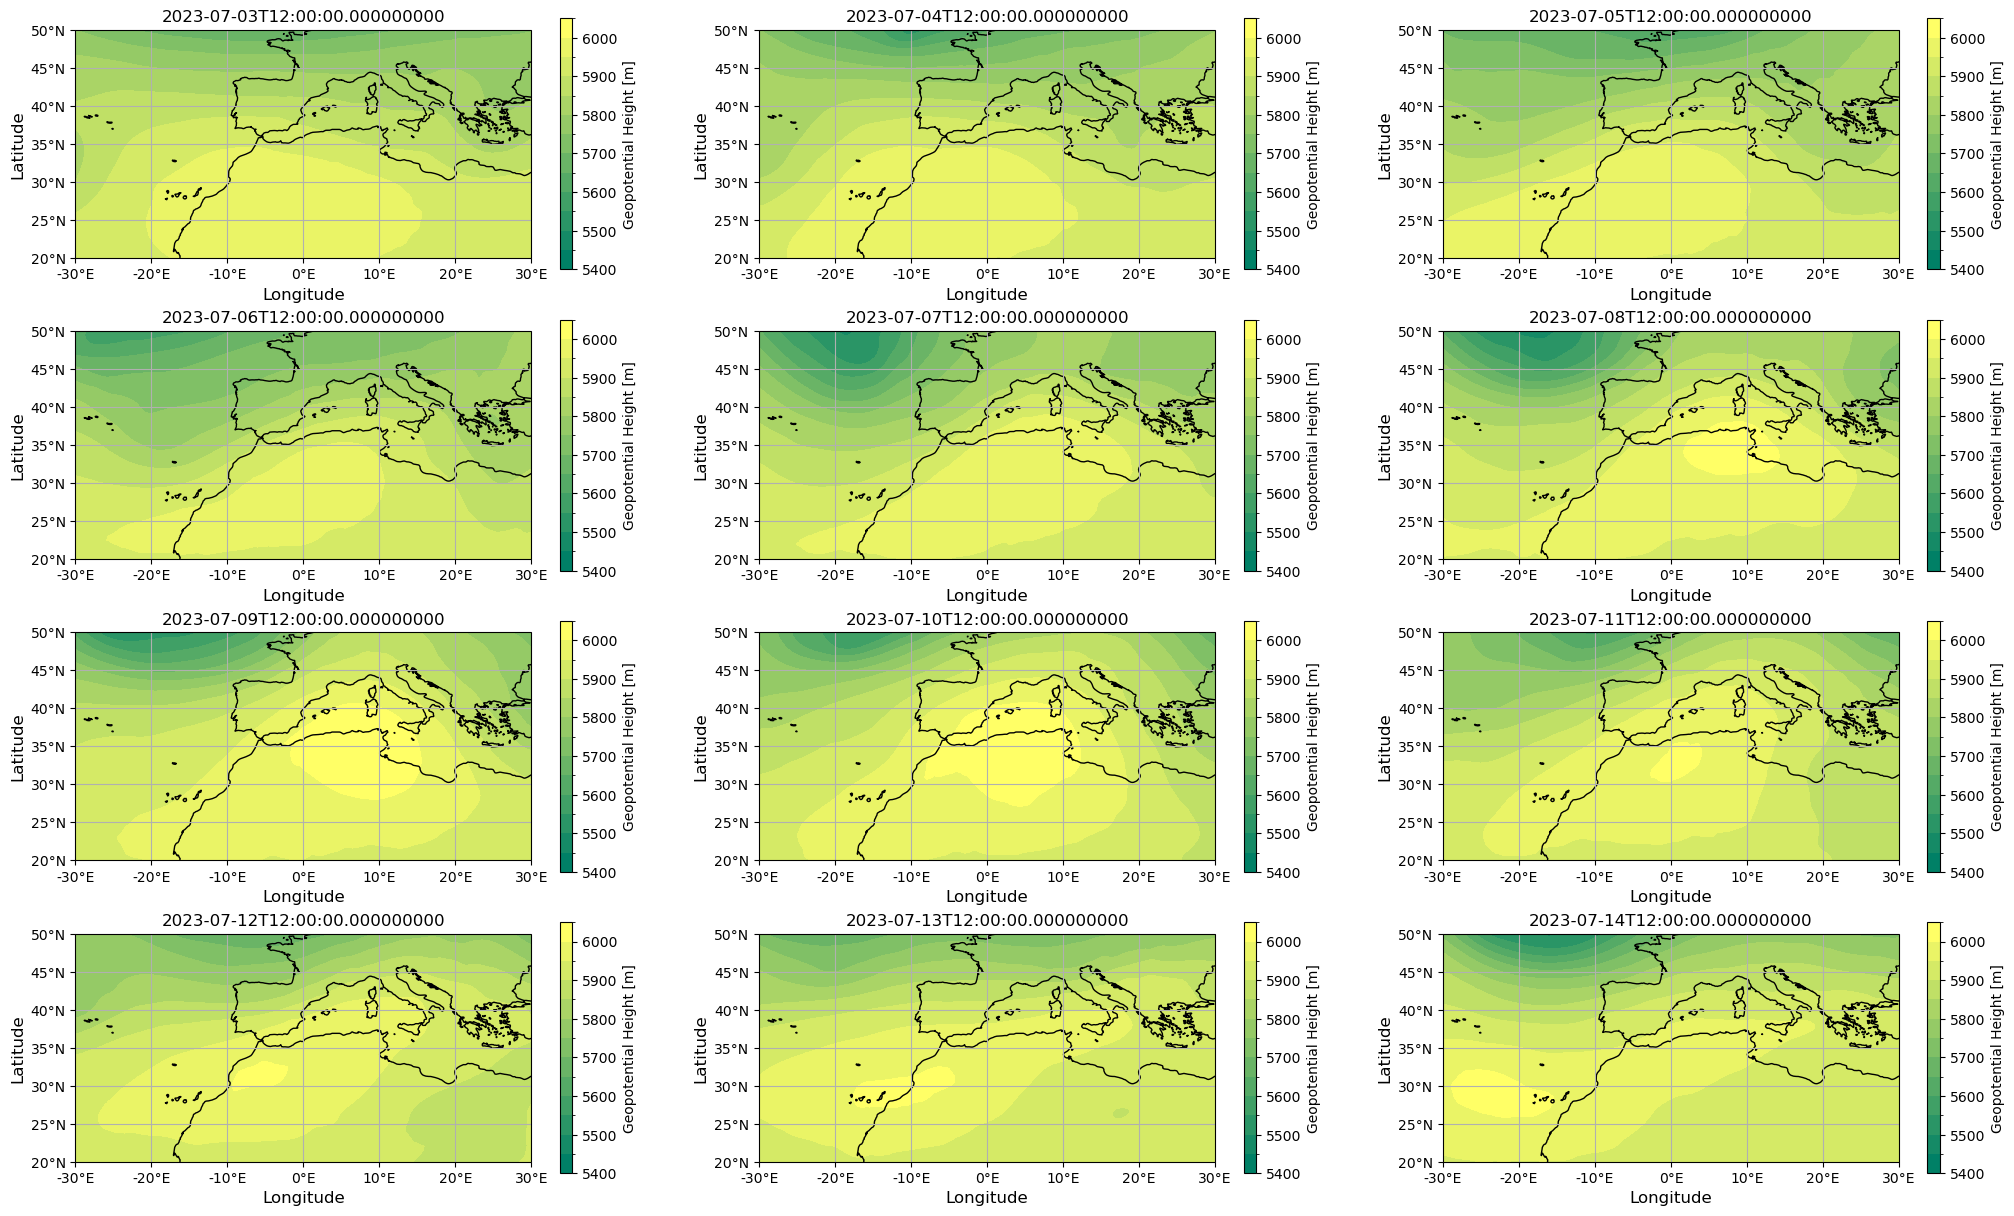

In [339]:
# Overview About the Geopotential Height Using ERA-5 Data
# Define the area of interest, a color bar and the levels
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5400, 6100, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
z_sliced = ERA_data['z'].sel(level = 500, lon=lon_range, lat=lat_range)/9.81

# Select specific timesteps [0 - 68]
z_selected_timesteps = z_sliced['time'].isel(time=slice(10, 68, 4))

# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = z_sliced.sel(time=z_selected_timesteps[i])
    rounded_time = plot_data.time.dt.round('min')  # Round the time values to the nearest minute
    xplot.contourf(plot_data, ax=ax, cmap='summer', levels=levels, cbar_kwargs={'label': 'Geopotential Height [m]'})
    ax.coastlines()
    ax.gridlines(draw_labels=False)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(rounded_time.values, fontsize=12)  # Set the title with rounded time values

# Save the plot as a PNG file
#plt.savefig('../analysis/ERA_t2m.pdf')

# Show the plot
plt.show()

### Reference for Comparison (Noon [2023.07.12, 12:00 UTC] and Midnight [2023.07.13, 00:00 UTC])

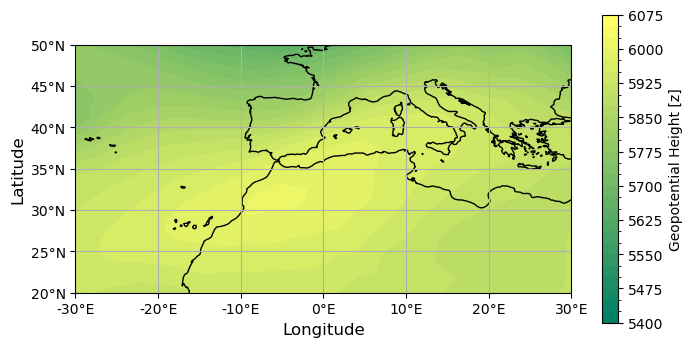

In [340]:
# Reference for Comparison (Noon [2023.07.12, 12:00 UTC] and Midnight [2023.07.13, 00:00 UTC])
# Define the area of interest and the levels of the colorbar
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5400, 6100, 25)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z_500 = ERA_data['z'].sel(level = 500, time='2023-07-12T12:00:00', lon=lon_range, lat=lat_range)/9.81
# remove "#" to use this line --> Reference for the Geopotential Height at Midnight
#ERA_z_500 = ERA_data['z'].sel(level = 500, time='2023-07-13T00:00:00', lon=lon_range, lat=lat_range)/9.81

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(ERA_z_500 , ax=ax, cmap='summer', levels=levels, cbar_kwargs={'label': 'Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

## ERA-5: 2 Meter Air Temperature (Absolute Values)

### Overview About the 2 Meter Air Temperature Using ERA-5 Data

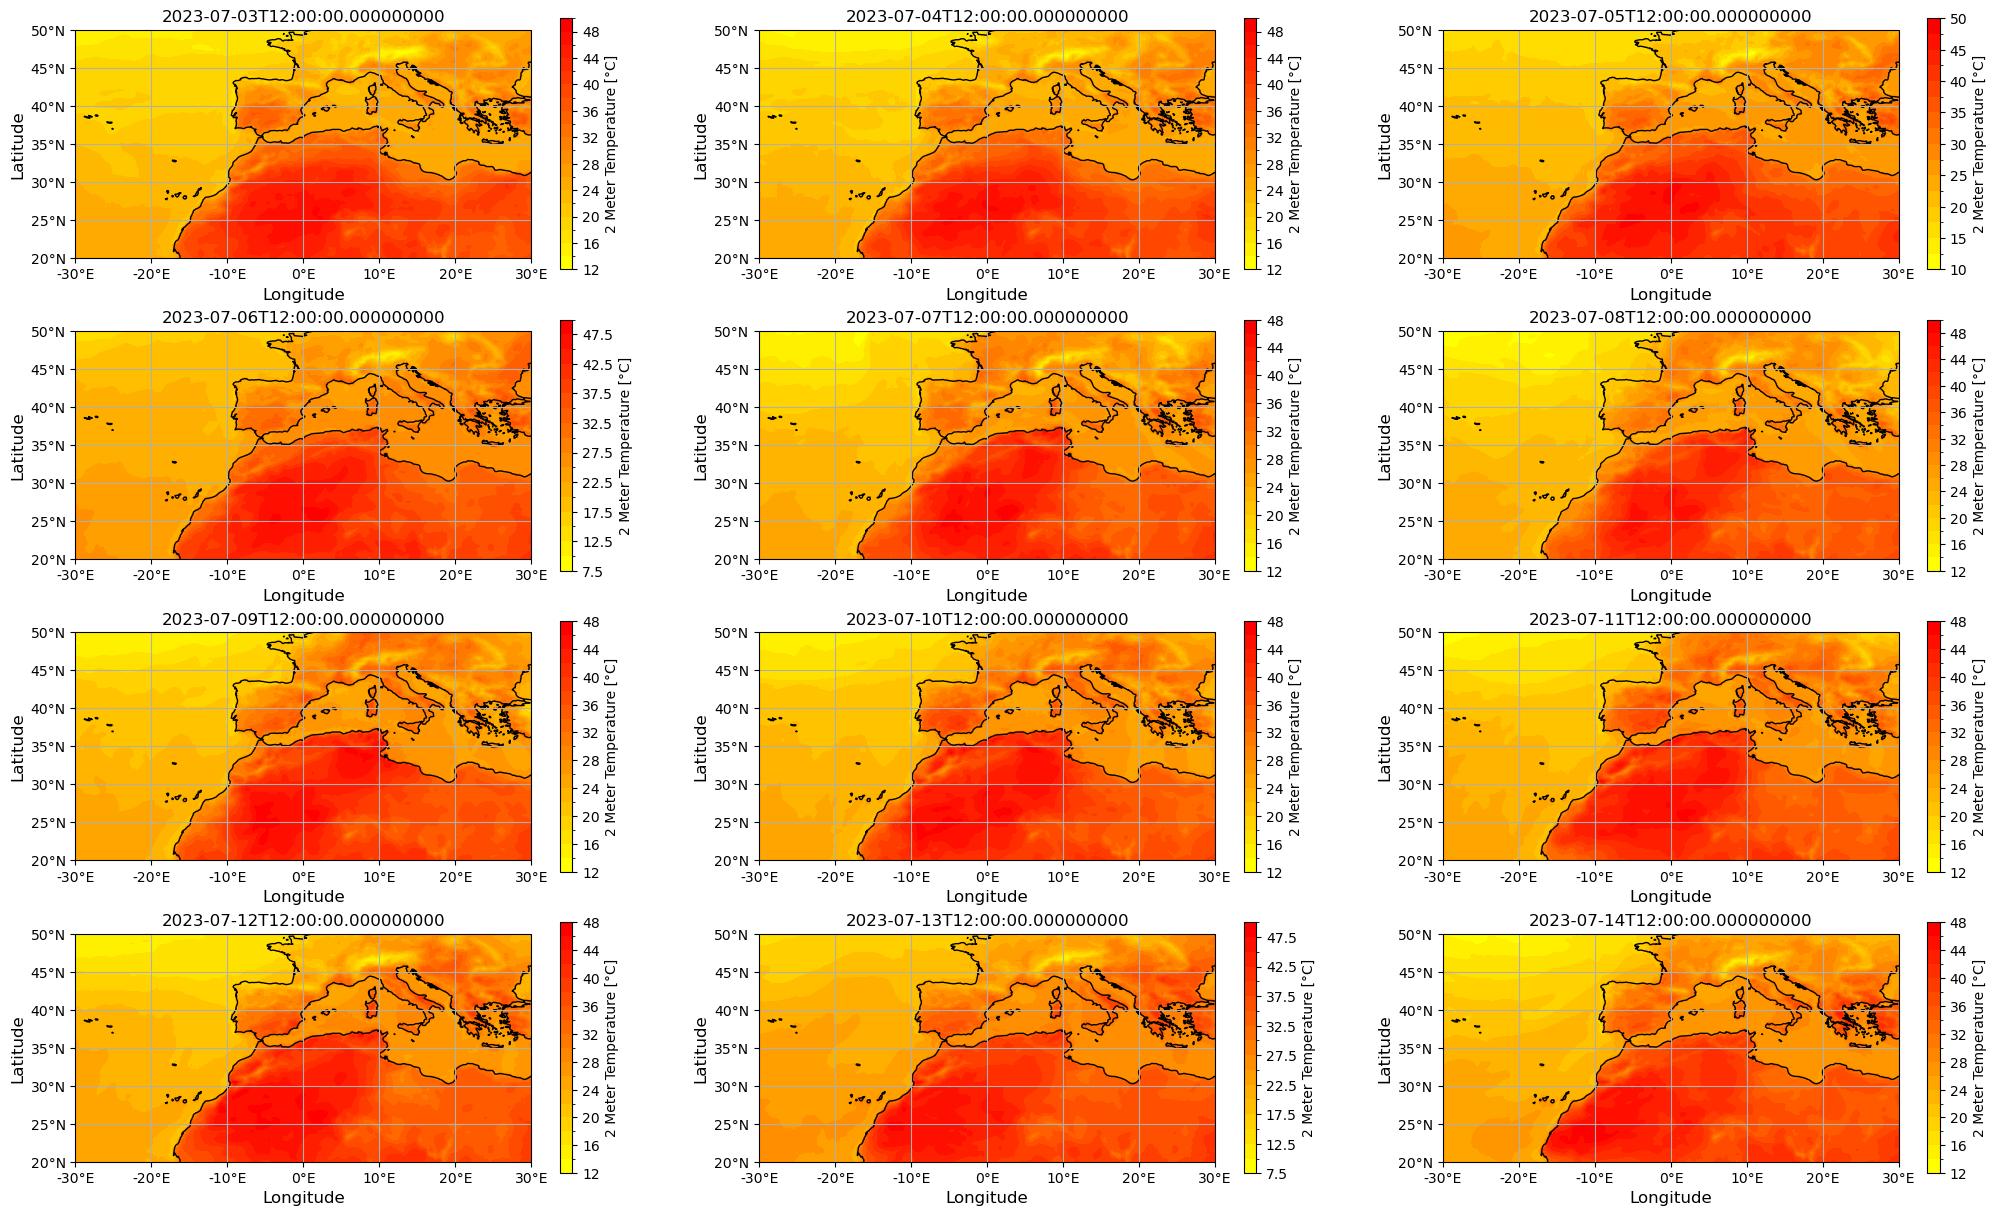

In [341]:
# Overview About the 2 Meter Air Temperature Using ERA-5 Data
# Define the area of interest, a color bar and the levels
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5, 55, 2)
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])

# Select the 2-meter temperature data for the specified longitude and latitude ranges
t2m_sliced = ERA_data['t2m'].sel(lon=lon_range, lat=lat_range)-273.15

# Select specific timesteps
t2m_selected_timesteps = t2m_sliced['time'].isel(time=slice(10, 68, 4))

# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = t2m_sliced.sel(time=t2m_selected_timesteps[i])
    rounded_time = plot_data.time.dt.round('min')  # Round the time values to the nearest minute
    xplot.contourf(plot_data, ax=ax, cmap=cm.autumn.reversed(), levels=20, cbar_kwargs={'label': '2 Meter Temperature [°C]'})
    ax.coastlines()
    ax.gridlines(draw_labels=False)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(rounded_time.values, fontsize=12)  # Set the title with rounded time values

# Save the plot as a PNG file
#plt.savefig('../analysis/ERA_t2m.pdf')

# Show the plot
plt.show()

### Reference for Comparison (Noon [2023.07.12, 12:00 UTC] and Midnight [2023.07.13, 00:00 UTC])

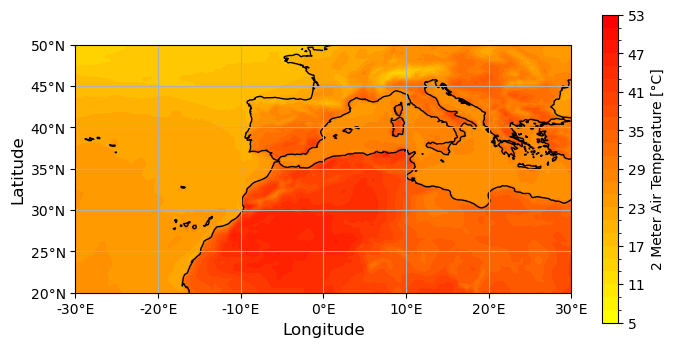

In [342]:
# Reference for Comparison (Noon [2023.07.12, 12:00 UTC] and Midnight [2023.07.13, 00:00 UTC])
# Define the area of interest, the colorbar and the levels of the colorbar
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5, 55, 2)

# Read the 2 meter air temperature at a specific date
# Converte all values into °C because we work with absolut values
ERA_t2m = ERA_data['t2m'].sel(time='2023-07-12T12:00:00', lon=lon_range, lat=lat_range)-273.15
# remove "#" to use this line --> Reference for the 2 meter air temperature at Midnight
#ERA_t2m  = ERA_data['t2m'].sel(time='2023-07-13T00:00:00', lon=lon_range, lat=lat_range)-273.15

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(ERA_t2m, ax=ax, cmap=cm.autumn.reversed(), levels=levels, cbar_kwargs={'label': '2 Meter Air Temperature [°C]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

# Pangu-Weather Data

## Read the data

In [343]:
# Read the data and edit the longitude, latitude and step dimension

# Read the Pangu 10 days forecast data 
Pangu_data_20230702 = xr.open_dataset('../data/HW_EU_20230702.nc').sortby('latitude', ascending = True)
# Rename the dimension "latitude" and "longitude"
Pangu_data_20230702 = Pangu_data_20230702.rename({'longitude': 'lon', 'latitude': 'lat'})
# Change the longitude from a 0°-360° system into a -180°-180° system
Pangu_data_20230702 = Pangu_data_20230702.assign_coords({"lon": (((Pangu_data_20230702.lon + 180) % 360) - 180)})
# Sort the values along the longitude dimension
Pangu_data_20230702 = Pangu_data_20230702.sortby('lon', ascending = True)
# Read the dimension "step"
delta_ns = Pangu_data_20230702['step']
# Extract the values from the dimension step
step_values = delta_ns.values
# Define a base date (it's the date of the forecast)
base_date = np.datetime64('2023-07-02T12:00:00')
# convert nanoseconds into second
seconds = step_values / 1e9
# create a new, empty list
converted_dates = []
# Create a for loop to interate over all timesteps
for second in seconds:
    # Convert the time delta in base date + number of seconds
    converted_dates.append(base_date + np.timedelta64(int(second), 's'))
# Put it into a numpy array 
converted_dates_array = np.array(converted_dates)
# assign the new dates to the dimension "step"
Pangu_data_20230702 = Pangu_data_20230702.assign_coords(step=('step', converted_dates_array))

# Read the Pangu 5 days forecast data and do the same as for the 10 day forecast
Pangu_data_20230707 = xr.open_dataset('../data/HW_EU_20230707.nc').sortby('latitude', ascending = True)
Pangu_data_20230707 = Pangu_data_20230707.rename({'longitude': 'lon', 'latitude': 'lat'})
Pangu_data_20230707 = Pangu_data_20230707.assign_coords({"lon": (((Pangu_data_20230707.lon + 180) % 360) - 180)})
Pangu_data_20230707 = Pangu_data_20230707.sortby('lon', ascending = True)
delta_ns = Pangu_data_20230707['step']
step_values = delta_ns.values
base_date = np.datetime64('2023-07-07T12:00:00')
seconds = step_values / 1e9
converted_dates = []
for second in seconds:
    converted_dates.append(base_date + np.timedelta64(int(second), 's'))
converted_dates_array = np.array(converted_dates)
Pangu_data_20230707 = Pangu_data_20230707.assign_coords(step=('step', converted_dates_array))

# Read the Pangu 1 days forecast data and do the same as for the 10 day forecast
Pangu_data_20230711 = xr.open_dataset('../data/HW_EU_20230711.nc').sortby('latitude', ascending = True)
Pangu_data_20230711 = Pangu_data_20230711.rename({'longitude': 'lon', 'latitude': 'lat'})
Pangu_data_20230711 = Pangu_data_20230711.assign_coords({"lon": (((Pangu_data_20230711.lon + 180) % 360) - 180)})
Pangu_data_20230711 = Pangu_data_20230711.sortby('lon', ascending = True)
delta_ns = Pangu_data_20230711['step']
step_values = delta_ns.values
base_date = np.datetime64('2023-07-11T12:00:00')
seconds = step_values / 1e9
converted_dates = []
for second in seconds:
    converted_dates.append(base_date + np.timedelta64(int(second), 's'))
converted_dates_array = np.array(converted_dates)
Pangu_data_20230711 = Pangu_data_20230711.assign_coords(step=('step', converted_dates_array))

# Make sure that the highest value is 180 and the lowest -180
print(Pangu_data_20230702['lon'].min().values, Pangu_data_20230702['lon'].max().values)
# Print the values
print(Pangu_data_20230702['lon'].values)

-180.0 179.75
[-180.   -179.75 -179.5  ...  179.25  179.5   179.75]


/var/folders/kg/k9dqcpss0y310jjn3nlh0z_w0000gn/T/ipykernel_13418/2412834199.py:28: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  Pangu_data_20230702 = Pangu_data_20230702.assign_coords(step=('step', converted_dates_array))
/var/folders/kg/k9dqcpss0y310jjn3nlh0z_w0000gn/T/ipykernel_13418/2412834199.py:43: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanos

## Pangu: Geopotential Height (Absolute Values)

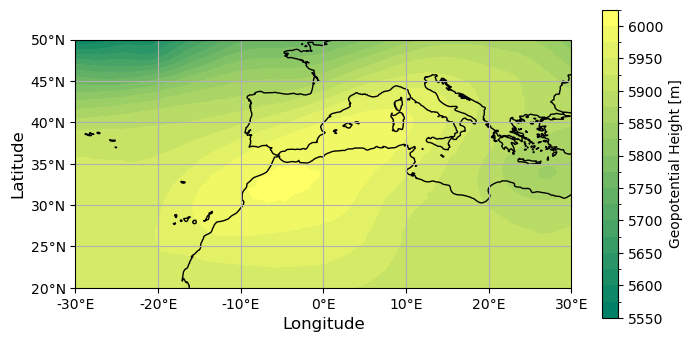

In [344]:
# Pangu: Geopotential Height (Absolute Values). You can change it from noon to midnight

# Define the area of interest and the levels of the color bar
lon_range = slice(-30, 30)
levels = np.arange(5550, 6050, 25)

# Read the geopotential height at 500hPa at a specific date
# Converte all values from geopotential into geopotential height, choose a date and an area of interest
Pangu_z = Pangu_data_20230702.z.sel(isobaricInhPa=500, step= '2023-07-12T12:00:00', lon = lon_range)/9.81

# remove "#" to use this line --> Reference for the geopotential height at 500hPa at Midnight
#Pangu_z = Pangu_data_20230702.z.sel(isobaricInhPa=500, step= '2023-07-13T00:00:00', lon = lon_range)/9.81

# Plot the geopotential height at 500hPa for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(Pangu_z, ax=ax, cmap='summer', levels=levels, cbar_kwargs={'label': 'Geopotential Height [m]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

## Geopotential Height Anomalies at Noon

### 10 Days Forecast Anomaly

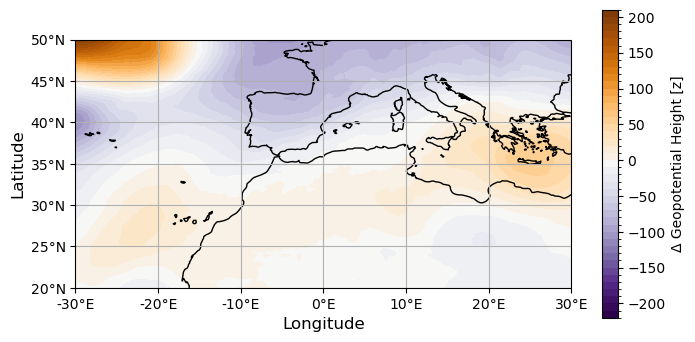

In [345]:
# 10 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-220, 220, 10)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-12T12:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230702.z.sel(isobaricInhPa=500, step= '2023-07-12T12:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap=cm.PuOr.reversed(), levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 5 Days Forecast Anomaly

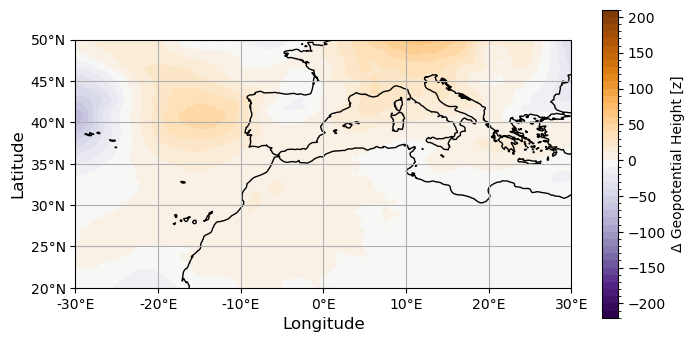

In [346]:
# 5 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-220, 220, 10)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-12T12:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230707.z.sel(isobaricInhPa=500, step= '2023-07-12T12:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap=cm.PuOr.reversed(), levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly

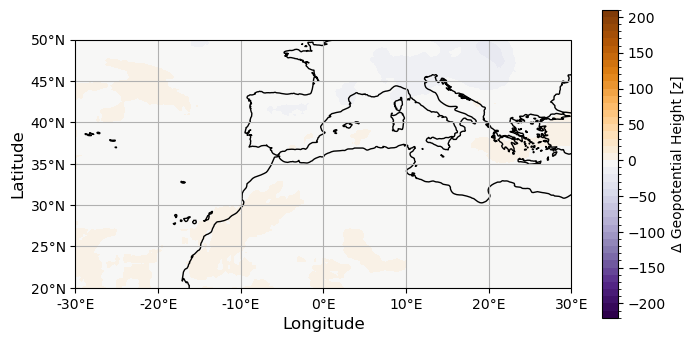

In [347]:
# 1 Day Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-220, 220, 10)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-12T12:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230711.z.sel(isobaricInhPa=500, step= '2023-07-12T12:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap=cm.PuOr.reversed(), levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

## Geopotential Height Anomalies at Midnight

### 10 Days Forecast Anomaly

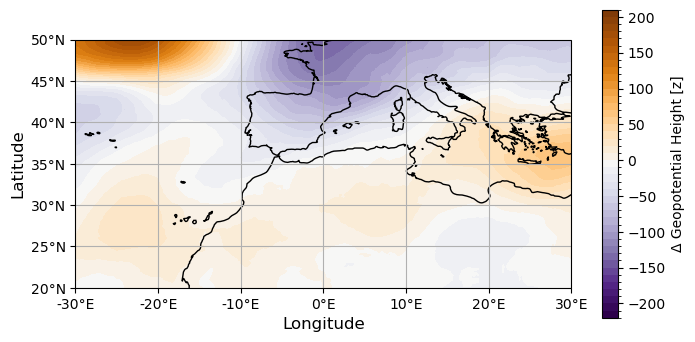

In [348]:
# 10 Day Forecast Anomaly (midnight)

# Define the area and the levels for the colorbar
levels = np.arange(-220, 220, 10)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-13T00:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230702.z.sel(isobaricInhPa=500, step= '2023-07-13T00:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap=cm.PuOr.reversed(), levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 5 Days Forecast Anomaly

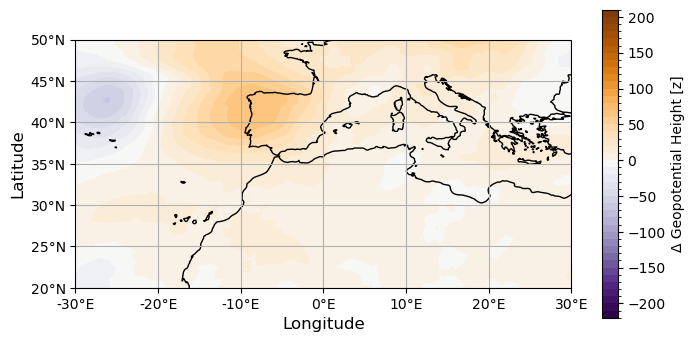

In [349]:
# 5 Day Forecast Anomaly (midnight)

# Define the area and the levels for the colorbar
levels = np.arange(-220, 220, 10)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-13T00:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230707.z.sel(isobaricInhPa=500, step= '2023-07-13T00:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap=cm.PuOr.reversed(), levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly

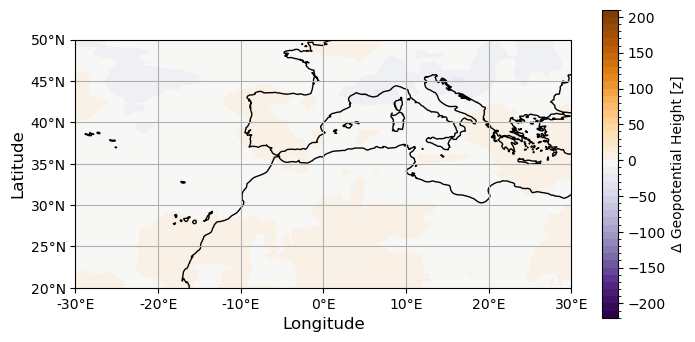

In [350]:
# 1 Day Forecast Anomaly (midnight)
# Define the area and the levels for the colorbar
levels = np.arange(-220, 220, 10)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-13T00:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230711.z.sel(isobaricInhPa=500, step= '2023-07-13T00:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap=cm.PuOr.reversed(), levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

## Pangu: 2 Meter Air Temperature (Absolute Values)

## 2 Meter Air Temperature Anomalies at Noon

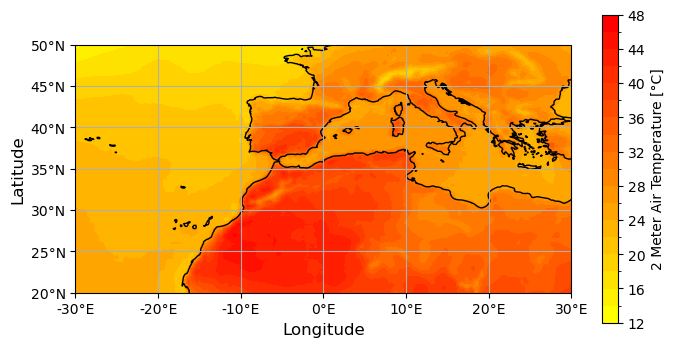

In [351]:
# Pangu: 2 Meter Air Temperature (Absolute Values)
# Define the area of interest, the colorbar and the levels of the colorbar
levels = np.arange(12, 50, 2)

# Read the 2 meter air temperature at a specific date
# Converte all values into °C because we work with absolut values
Pangu_t2 = Pangu_data_20230702.t2.sel(step= '2023-07-12T12:00:00', lon = lon_range)-273.15
# remove "#" to use this line --> Reference for the 2 meter air temperature at Midnight
#ERA_t2m  = ERA_data['t2m'].sel(time='2023-07-13T00:00:00', lon=lon_range, lat=lat_range)-273.15

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(Pangu_t2, ax=ax, cmap=cm.autumn.reversed(), levels=levels, cbar_kwargs={'label': '2 Meter Air Temperature [°C]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 10 Day Forecast

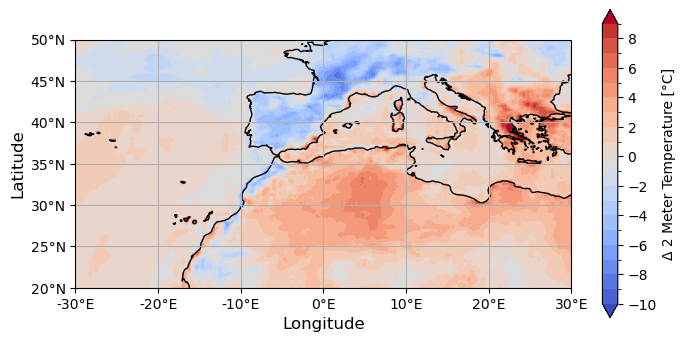

In [352]:
# 10 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-10, 10, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2 = ERA_data['t2m'].sel(time='2023-07-12T12:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230702.t2.sel(step= '2023-07-12T12:00:00')-273.15

# Calculate Anomaly
t2_anomaly = ERA_t2 - Pangu_t2
# Define the area of interest
t2_anomaly = t2_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [°C]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 5 Days Forescast Anomaly

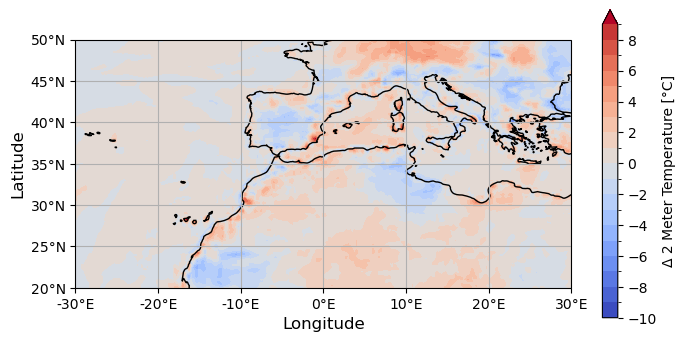

In [353]:
# 5 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-10, 10, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2 = ERA_data['t2m'].sel(time='2023-07-12T12:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230707.t2.sel(step= '2023-07-12T12:00:00')-273.15

# Calculate Anomaly
t2_anomaly = ERA_t2 - Pangu_t2
# Define the area of interest
t2_anomaly = t2_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [°C]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly

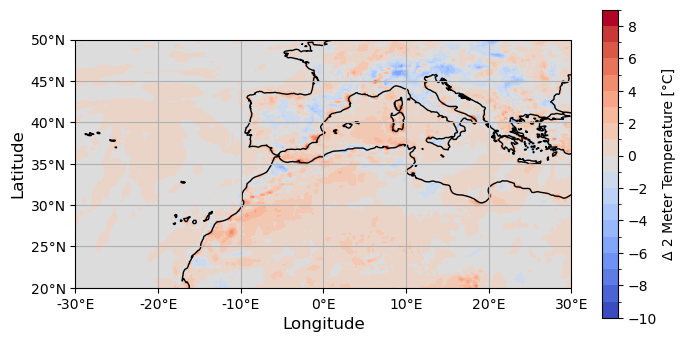

In [354]:
# 1 Days Forecast Anomaly (noon)
# Define the area and the levels for the colorbar
levels = np.arange(-10, 10, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2 = ERA_data['t2m'].sel(time='2023-07-12T12:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230711.t2.sel(step= '2023-07-12T12:00:00')-273.15

# Calculate Anomaly
t2_anomaly = ERA_t2 - Pangu_t2
# Define the area of interest
t2_anomaly = t2_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [°C]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

## 2 Meter Air Temperature Anomalies at Midnight

### 10 Days Forecast Anomaly

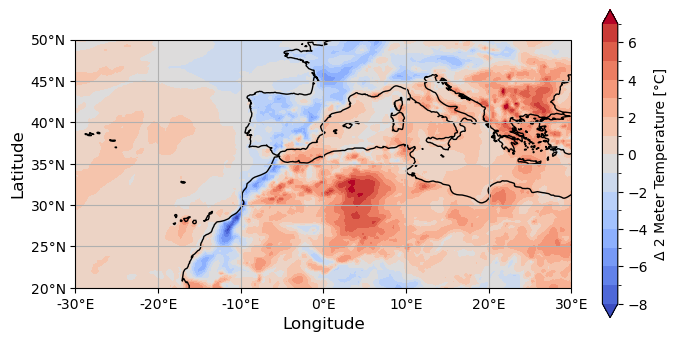

In [355]:
# 10 Days Forecast Anomaly (midnight)
# Define the area and the levels for the colorbar
levels = np.arange(-8, 8, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2 = ERA_data['t2m'].sel(time='2023-07-13T00:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230702.t2.sel(step= '2023-07-13T00:00:00')-273.15

# Calculate Anomaly
t2_anomaly = ERA_t2 - Pangu_t2
# Define the area of interest
t2_anomaly = t2_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [°C]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 5 Days Forecast Anomaly

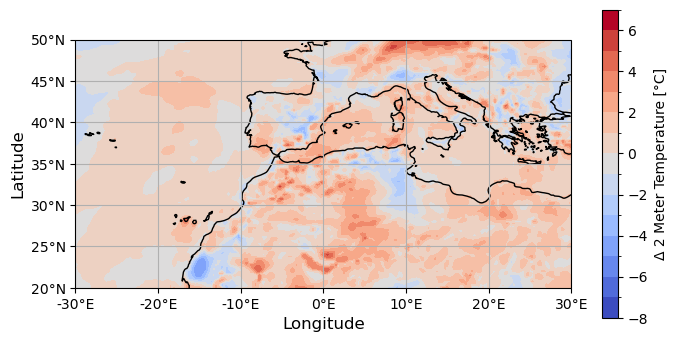

In [356]:
# 5 Days Forecast Anomaly (midnight)
# Define the area and the levels for the colorbar
levels = np.arange(-8, 8, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2 = ERA_data['t2m'].sel(time='2023-07-13T00:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230707.t2.sel(step= '2023-07-13T00:00:00')-273.15

# Calculate Anomaly
t2_anomaly = ERA_t2 - Pangu_t2
# Define the area of interest
t2_anomaly = t2_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [°C]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly

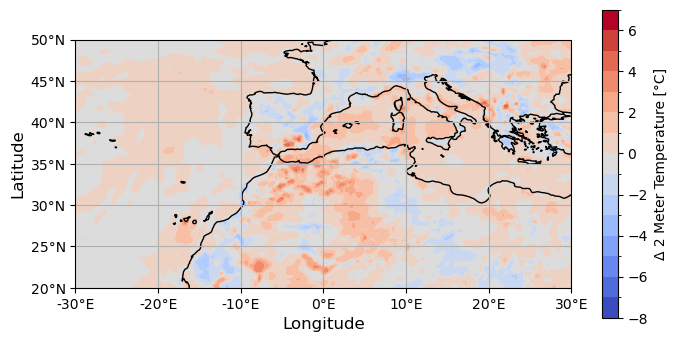

In [357]:
# 1 Days Forecast Anomaly (midnight)
# Define the area and the levels for the colorbar
levels = np.arange(-8, 8, 1)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2 = ERA_data['t2m'].sel(time='2023-07-13T00:00:00')-273.15

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230711.t2.sel(step= '2023-07-13T00:00:00')-273.15

# Calculate Anomaly
t2_anomaly = ERA_t2 - Pangu_t2
# Define the area of interest
t2_anomaly = t2_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [°C]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

# Further Analyisis

## Scatter- and Lineplots

### Southern Europe

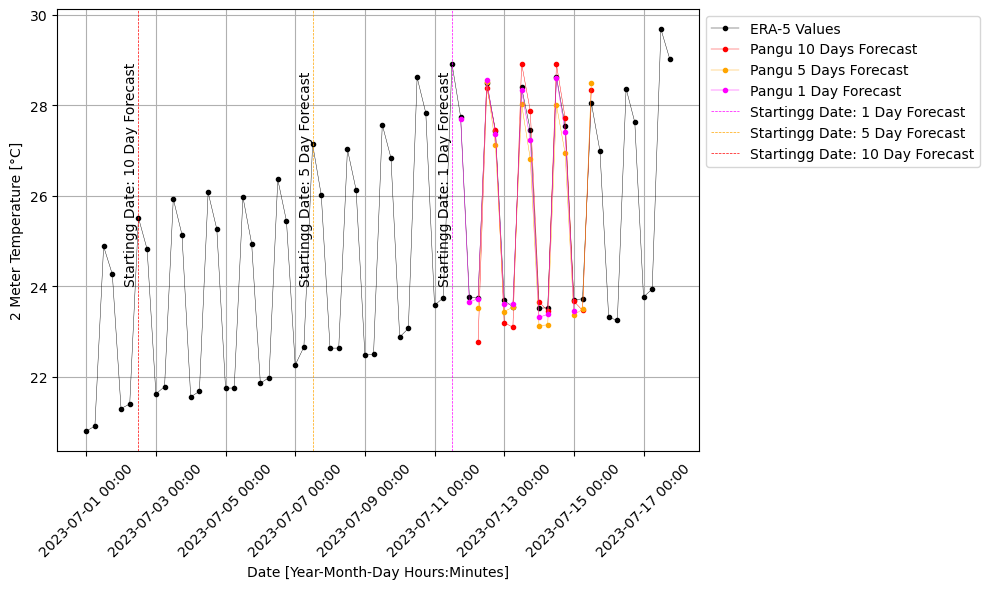

In [358]:
# Define an area of Southern Europe [-10°E - 25°E; 35°N - 45°N]
latitude = slice(35,45)
longitude = slice(-10, 25)

t2m_area = ERA_data['t2m'].sel(lon=longitude, lat=latitude) - 273.15 
mean_temperature_time = t2m_area.mean(dim=('lon', 'lat'))
time_index = t2m_area.time.to_pandas()
temperature_values = mean_temperature_time.values

# Select the 2-meter temperature data (Pangu) for the nearest coordinates of Rome
t2_area_02 = Pangu_data_20230702['t2'].sel(lon=longitude, lat=latitude) - 273.15
mean_temperature_time_P2 = t2_area_02.mean(dim=('lon', 'lat'))
temperature_values_Pangu_02 = mean_temperature_time_P2.values
time_index_Pangu_02 = t2_area_02.step.to_pandas()

t2_area_07 = Pangu_data_20230707['t2'].sel(lon=longitude, lat=latitude) - 273.15
mean_temperature_time_P7 = t2_area_07.mean(dim=('lon', 'lat'))
temperature_values_Pangu_07 = mean_temperature_time_P7.values
time_index_Pangu_07 = t2_area_07.step.to_pandas()

t2_area_11 = Pangu_data_20230711['t2'].sel(lon=longitude, lat=latitude) - 273.15
mean_temperature_time_P11 = t2_area_11.mean(dim=('lon', 'lat'))
temperature_values_Pangu_11 = mean_temperature_time_P11.values
time_index_Pangu_11 = t2_area_11.step.to_pandas()

# Plot line plot with temperature values over time
plt.figure(figsize=(10, 6))
plt.plot(time_index, temperature_values, marker='o', linestyle='-', markersize=3, linewidth=0.3, color='black', label='ERA-5 Values')
plt.plot(time_index_Pangu_02, temperature_values_Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
plt.plot(time_index_Pangu_07, temperature_values_Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
plt.plot(time_index_Pangu_11, temperature_values_Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
plt.ylabel('2 Meter Temperature [°C]')
plt.xticks(rotation=45) 
plt.grid(True)
# Change labels in x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.axvline(pd.Timestamp('2023-07-11T12:00:00'), color='magenta', linestyle='--', label='Startingg Date: 1 Day Forecast', linewidth = 0.5)
plt.text(pd.Timestamp('2023-07-11T12:00:00'), 24, 'Startingg Date: 1 Day Forecast', rotation=90, va='bottom', ha='right')
plt.axvline(pd.Timestamp('2023-07-07T12:00:00'), color='orange', linestyle='--', label='Startingg Date: 5 Day Forecast', linewidth = 0.5)
plt.text(pd.Timestamp('2023-07-07T12:00:00'), 24, 'Startingg Date: 5 Day Forecast', rotation=90, va='bottom', ha='right')
plt.axvline(pd.Timestamp('2023-07-02T12:00:00'), color='red', linestyle='--', label='Startingg Date: 10 Day Forecast', linewidth = 0.5)
plt.text(pd.Timestamp('2023-07-02T12:00:00'), 24, 'Startingg Date: 10 Day Forecast', rotation=90, va='bottom', ha='right')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

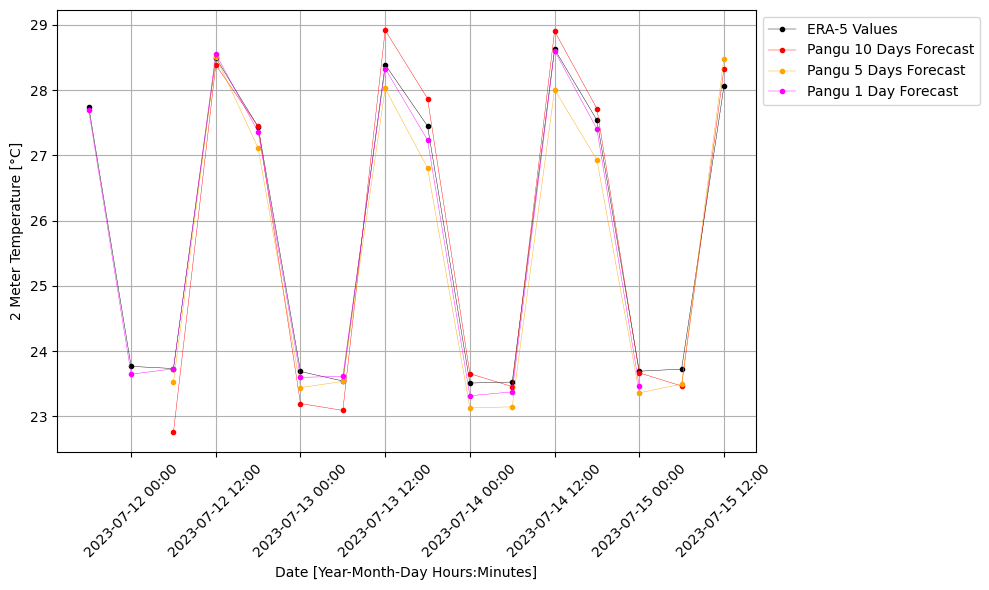

In [359]:
# Define an area of Southern Europe [-10°E - 25°E; 35°N - 45°N]
latitude = slice(35,45)
longitude = slice(-10, 25)

t2m_area = ERA_data['t2m'].sel(lon=longitude, lat=latitude) - 273.15 
mean_temperature_time = t2m_area.mean(dim=('lon', 'lat'))
time_index = t2m_area.time.to_pandas()
temperature_values = mean_temperature_time.values

# Select the 2-meter temperature data (Pangu) for the nearest coordinates of Rome
t2_area_02 = Pangu_data_20230702['t2'].sel(lon=longitude, lat=latitude) - 273.15
mean_temperature_time_P2 = t2_area_02.mean(dim=('lon', 'lat'))
temperature_values_Pangu_02 = mean_temperature_time_P2.values
time_index_Pangu_02 = t2_area_02.step.to_pandas()

t2_area_07 = Pangu_data_20230707['t2'].sel(lon=longitude, lat=latitude) - 273.15
mean_temperature_time_P7 = t2_area_07.mean(dim=('lon', 'lat'))
temperature_values_Pangu_07 = mean_temperature_time_P7.values
time_index_Pangu_07 = t2_area_07.step.to_pandas()

t2_area_11 = Pangu_data_20230711['t2'].sel(lon=longitude, lat=latitude) - 273.15
mean_temperature_time_P11 = t2_area_11.mean(dim=('lon', 'lat'))
temperature_values_Pangu_11 = mean_temperature_time_P11.values
time_index_Pangu_11 = t2_area_11.step.to_pandas()

# Filter the temperature values for a specific time range
start_time = pd.Timestamp('2023-07-11T18:00:00')
end_time = pd.Timestamp('2023-07-15T12:00:00')
time_mask = (time_index >= start_time) & (time_index <= end_time)
filtered_temperature_values = temperature_values[time_mask]
filtered_time_index = time_index[time_mask]

# Plot line plot with temperature values over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_time_index, filtered_temperature_values, marker='o', linestyle='-', markersize=3, linewidth=0.3, color='black', label='ERA-5 Values')
plt.plot(time_index_Pangu_02, temperature_values_Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
plt.plot(time_index_Pangu_07, temperature_values_Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
plt.plot(time_index_Pangu_11, temperature_values_Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
plt.ylabel('2 Meter Temperature [°C]')
plt.xticks(rotation=45) 
plt.grid(True)
# Change labels in x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

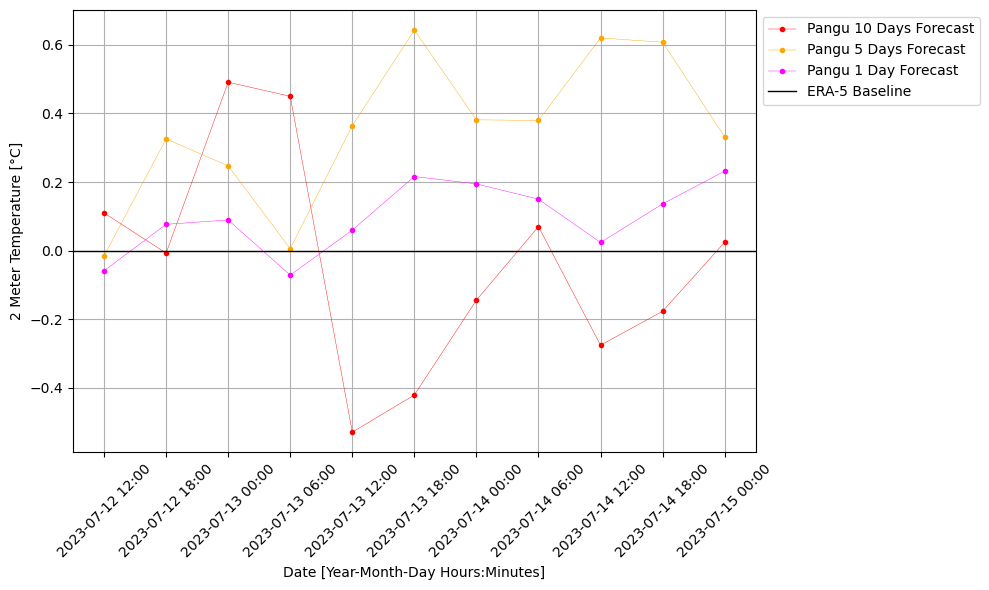

In [360]:
# Define an area of Southern Europe [-10°E - 25°E; 35°N - 45°N]
latitude = slice(35,45)
longitude = slice(-10, 25)

t2m_area = ERA_data['t2m'].sel(lon=longitude, lat=latitude) - 273.15 
mean_temperature_time = t2m_area.mean(dim=('lon', 'lat'))
time_index = t2m_area.time.to_pandas()
temperature_values = mean_temperature_time.values

# Select the 2-meter temperature data (Pangu) for the nearest coordinates of Rome
t2_area_02 = Pangu_data_20230702['t2'].sel(lon=longitude, lat=latitude) - 273.15
mean_temperature_time_P2 = t2_area_02.mean(dim=('lon', 'lat'))
temperature_values_Pangu_02 = mean_temperature_time_P2.values
time_index_Pangu_02 = t2_area_02.step.to_pandas()

t2_area_07 = Pangu_data_20230707['t2'].sel(lon=longitude, lat=latitude) - 273.15
mean_temperature_time_P7 = t2_area_07.mean(dim=('lon', 'lat'))
temperature_values_Pangu_07 = mean_temperature_time_P7.values
time_index_Pangu_07 = t2_area_07.step.to_pandas()

t2_area_11 = Pangu_data_20230711['t2'].sel(lon=longitude, lat=latitude) - 273.15
mean_temperature_time_P11 = t2_area_11.mean(dim=('lon', 'lat'))
temperature_values_Pangu_11 = mean_temperature_time_P11.values
time_index_Pangu_11 = t2_area_11.step.to_pandas()

# Filter the temperature values for a specific time range
start_time = pd.Timestamp('2023-07-12T12:00:00')
end_time = pd.Timestamp('2023-07-15T00:00:00')
time_mask = (time_index >= start_time) & (time_index <= end_time)
# Filter the temperature values for a specific time range
time_mask_P2 = (time_index_Pangu_02 >= start_time) & (time_index_Pangu_02 <= end_time)
filtered_time_index_P2 = time_index_Pangu_02[time_mask_P2]
time_mask_P7 = (time_index_Pangu_07 >= start_time) & (time_index_Pangu_07 <= end_time)
filtered_time_index_P7 = time_index_Pangu_07[time_mask_P7]
time_mask_P11 = (time_index_Pangu_11 >= start_time) & (time_index_Pangu_11 <= end_time)
filtered_time_index_P11 = time_index_Pangu_11[time_mask_P11]

Pangu_02 = temperature_values[time_mask] - temperature_values_Pangu_02[time_mask_P2]
Pangu_07 = temperature_values[time_mask] - temperature_values_Pangu_07[time_mask_P7]
Pangu_11 = temperature_values[time_mask] - temperature_values_Pangu_11[time_mask_P11]

# Plot line plot with temperature values over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_time_index_P2, Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
plt.plot(filtered_time_index_P7, Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
plt.plot(filtered_time_index_P11, Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
plt.ylabel('2 Meter Temperature [°C]')
plt.xticks(rotation=45) 
plt.grid(True)
# Change labels in x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.axhline(0, color='black', linestyle='-', label='ERA-5 Baseline', linewidth = 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### Cities

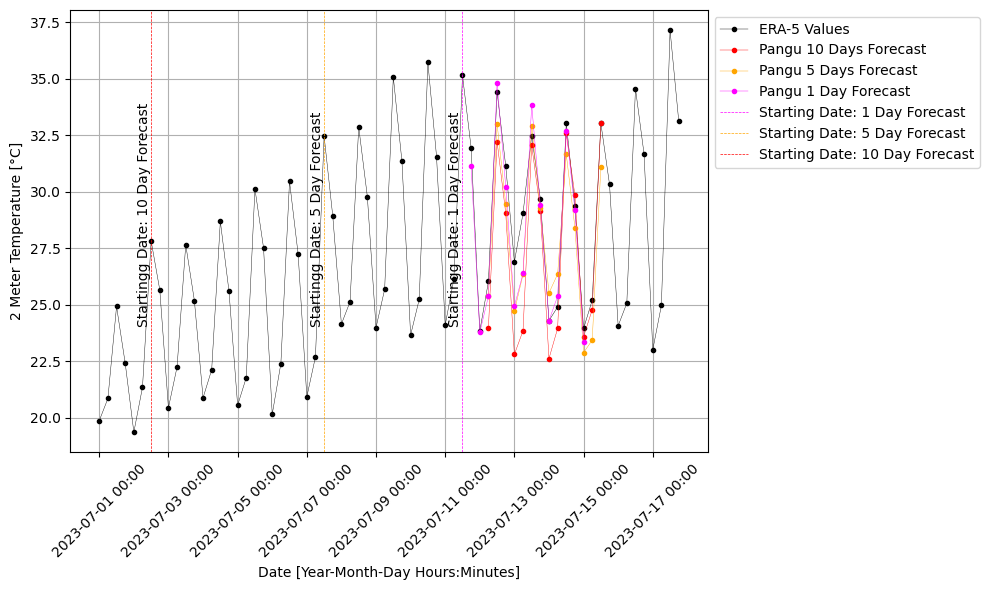

In [361]:
# Overview about Rome
# Define an area of Southern Europe [-10°E - 25°E; 35°N - 45°N]
latitude = 41.902782
longitude = 12.496366

t2m_city = ERA_data['t2m'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15 
time_index = t2m_city.time.to_pandas()
temperature_values = t2m_city.values

# Select the 2-meter temperature data (Pangu) for the nearest coordinates of Rome
t2_city_02 = Pangu_data_20230702['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
time_index_Pangu_02 = t2_city_02.step.to_pandas()
temperature_values_Pangu_02 = t2_city_02.values

t2_city_07 = Pangu_data_20230707['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
time_index_Pangu_07 = t2_city_07.step.to_pandas()
temperature_values_Pangu_07 = t2_city_07.values

t2_city_11 = Pangu_data_20230711['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
time_index_Pangu_11 = t2_city_11.step.to_pandas()
temperature_values_Pangu_11 = t2_city_11.values

# Plot line plot with temperature values over time
plt.figure(figsize=(10, 6))
plt.plot(time_index, temperature_values, marker='o', linestyle='-', markersize=3, linewidth=0.3, color='black', label='ERA-5 Values')
plt.plot(time_index_Pangu_02, temperature_values_Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
plt.plot(time_index_Pangu_07, temperature_values_Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
plt.plot(time_index_Pangu_11, temperature_values_Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
plt.ylabel('2 Meter Temperature [°C]')
plt.xticks(rotation=45) 
plt.grid(True)
# Change labels in x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.axvline(pd.Timestamp('2023-07-11T12:00:00'), color='magenta', linestyle='--', label='Starting Date: 1 Day Forecast', linewidth = 0.5)
plt.text(pd.Timestamp('2023-07-11T12:00:00'), 24, 'Startingg Date: 1 Day Forecast', rotation=90, va='bottom', ha='right')
plt.axvline(pd.Timestamp('2023-07-07T12:00:00'), color='orange', linestyle='--', label='Starting Date: 5 Day Forecast', linewidth = 0.5)
plt.text(pd.Timestamp('2023-07-07T12:00:00'), 24, 'Startingg Date: 5 Day Forecast', rotation=90, va='bottom', ha='right')
plt.axvline(pd.Timestamp('2023-07-02T12:00:00'), color='red', linestyle='--', label='Starting Date: 10 Day Forecast', linewidth = 0.5)
plt.text(pd.Timestamp('2023-07-02T12:00:00'), 24, 'Startingg Date: 10 Day Forecast', rotation=90, va='bottom', ha='right')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

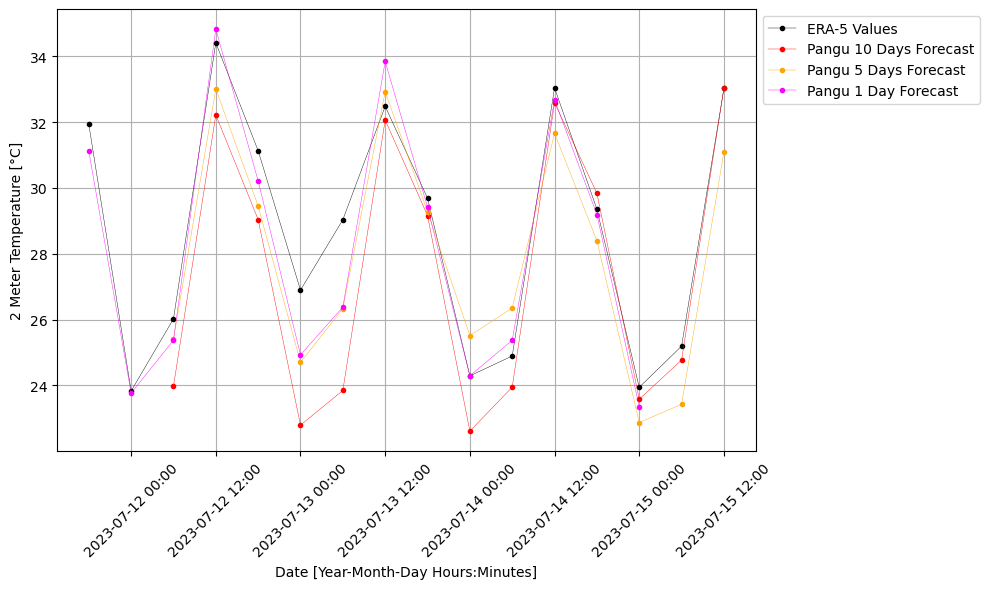

In [362]:
# Zoom in for Rome
# Coordinates Rome
latitude = 41.902782
longitude = 12.496366

# Select the 2-meter temperature data (ERA-5) for the nearest coordinates of Rome
t2m_city = ERA_data['t2m'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15 
time_index = t2m_city.time.to_pandas()
temperature_values = t2m_city.values

# Select the 2-meter temperature data (Pangu) for the nearest coordinates of Rome
t2_city_02 = Pangu_data_20230702['t2'].sel(lon=longitude, lat=latitude,method='nearest') - 273.15
time_index_Pangu_02 = t2_city_02.step.to_pandas()
temperature_values_Pangu_02 = t2_city_02.values

t2_city_07 = Pangu_data_20230707['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
time_index_Pangu_07 = t2_city_07.step.to_pandas()
temperature_values_Pangu_07 = t2_city_07.values

t2_city_11 = Pangu_data_20230711['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
time_index_Pangu_11 = t2_city_11.step.to_pandas()
temperature_values_Pangu_11 = t2_city_11.values

# Filter the temperature values for a specific time range
start_time = pd.Timestamp('2023-07-11T18:00:00')
end_time = pd.Timestamp('2023-07-15T12:00:00')
time_mask = (time_index >= start_time) & (time_index <= end_time)
filtered_temperature_values = temperature_values[time_mask]

# Plot line plot with temperature values over time
plt.figure(figsize=(10, 6))
plt.plot(time_index[time_mask], filtered_temperature_values, marker='o', linestyle='-', markersize=3, linewidth=0.3, color='black', label='ERA-5 Values')
plt.plot(time_index_Pangu_02, temperature_values_Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
plt.plot(time_index_Pangu_07, temperature_values_Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
plt.plot(time_index_Pangu_11, temperature_values_Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
plt.ylabel('2 Meter Temperature [°C]')
plt.xticks(rotation=45) 
plt.grid(True)
# Change labels in x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

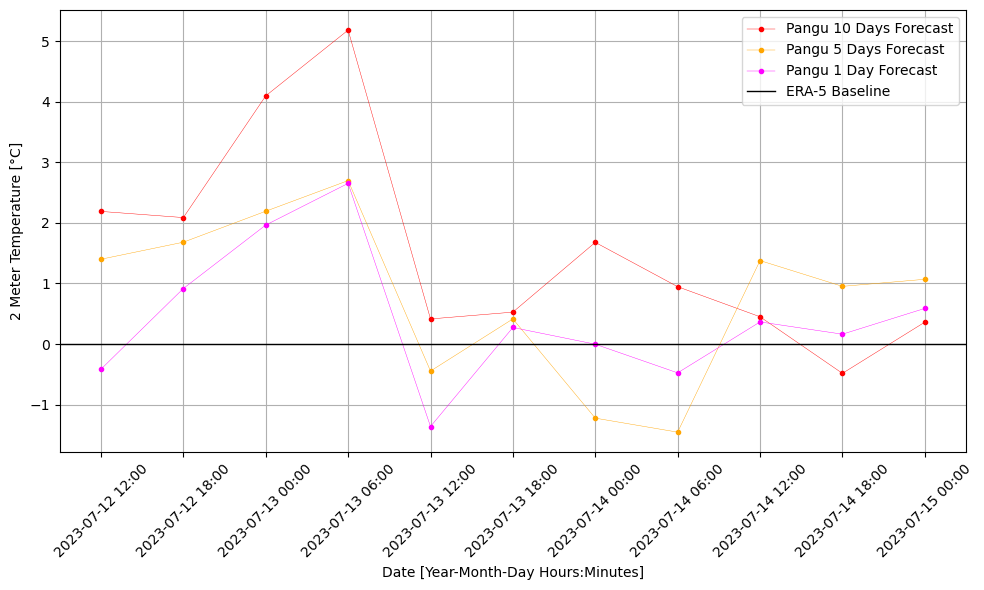

In [363]:
# Anomalies for Rome
# Coordinates Rome
latitude = 41.902782
longitude = 12.496366

# Select the 2-meter temperature data (ERA-5) for the nearest coordinates of Rome
t2m_city = ERA_data['t2m'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15 
time_index = t2m_city.time.to_pandas()
temperature_values = t2m_city.values

# Select the 2-meter temperature data (Pangu) for the nearest coordinates of Rome
t2_city_02 = Pangu_data_20230702['t2'].sel(lon=longitude, lat=latitude,method='nearest') - 273.15
time_index_Pangu_02 = t2_city_02.step.to_pandas()
temperature_values_Pangu_02 = t2_city_02.values

t2_city_07 = Pangu_data_20230707['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
time_index_Pangu_07 = t2_city_07.step.to_pandas()
temperature_values_Pangu_07 = t2_city_07.values

t2_city_11 = Pangu_data_20230711['t2'].sel(lon=longitude, lat=latitude, method='nearest') - 273.15
time_index_Pangu_11 = t2_city_11.step.to_pandas()
temperature_values_Pangu_11 = t2_city_11.values

# Filter the temperature values for a specific time range
start_time = pd.Timestamp('2023-07-12T12:00:00')
end_time = pd.Timestamp('2023-07-15T00:00:00')
time_mask = (time_index >= start_time) & (time_index <= end_time)
# Filter the temperature values for a specific time range
time_mask_P2 = (time_index_Pangu_02 >= start_time) & (time_index_Pangu_02 <= end_time)
filtered_time_index_P2 = time_index_Pangu_02[time_mask_P2]
time_mask_P7 = (time_index_Pangu_07 >= start_time) & (time_index_Pangu_07 <= end_time)
filtered_time_index_P7 = time_index_Pangu_07[time_mask_P7]
time_mask_P11 = (time_index_Pangu_11 >= start_time) & (time_index_Pangu_11 <= end_time)
filtered_time_index_P11 = time_index_Pangu_11[time_mask_P11]

Pangu_02 = temperature_values[time_mask] - temperature_values_Pangu_02[time_mask_P2]
Pangu_07 = temperature_values[time_mask] - temperature_values_Pangu_07[time_mask_P7]
Pangu_11 = temperature_values[time_mask] - temperature_values_Pangu_11[time_mask_P11]

# Plot line plot with temperature values over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_time_index_P2, Pangu_02, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='red', label='Pangu 10 Days Forecast')
plt.plot(filtered_time_index_P7, Pangu_07, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='orange', label='Pangu 5 Days Forecast')
plt.plot(filtered_time_index_P11, Pangu_11, marker='o', linestyle='-', markersize=3,linewidth=0.3, color='magenta', label='Pangu 1 Day Forecast')
plt.xlabel('Date [Year-Month-Day Hours:Minutes]')
plt.ylabel('2 Meter Temperature [°C]')
plt.xticks(rotation=45) 
plt.grid(True)
# Change labels in x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.axhline(0, color='black', linestyle='-', label='ERA-5 Baseline', linewidth = 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()